<a href="https://colab.research.google.com/github/abhijithjayakara/Amazon-Prime-TV-Shows-and-Movies/blob/main/Amazon_Prime_TV_Shows_and_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Capstone Project: Exploratory Data Analysis

# **Amazon Prime TV Shows and Movies**

In today's competitive streaming industry, platforms like Amazon Prime Video are constantly expanding their content libraries to cater to diverse audiences. With a growing number of shows and movies available on the platform, data-driven insights play a crucial role in understanding trends, audience preferences, and content strategy.

This data set was created to list all shows available on Amazon Prime streaming, and analyze the data to find interesting facts. This dataset has data available in the United States.

This dataset has 2 csv files and it is a mix of categorical and numeric values.

https://drive.google.com/file/d/1CAwRLa4mIhHDQqOolpzv4IRWrHbxbJJC/view?usp=sharing

https://drive.google.com/file/d/1Dx8-EZEOUyCzD8BpwpItC9Hg2tzVYWAn/view?usp=sharing

**Problem Statement**

This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

1. Content Diversity: What genres and categories dominate the platform?

2. Regional Availability: How does content distribution vary across different regions?

3. Trends Over Time: How has Amazon Prime’s content library evolved?

4. IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?

*By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.*

## Data files evaluation criteria

1. Efficient approach to the problem statement
2. Data Exploration techniques and logic.
3. Logic of handling missing values, and outliers.
4. Visualization logic.
5. Forming insights and explaining your understandings
6. Understanding of how your project is useful to stakeholders.




## Necessary Libraries

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Visualization Style

In [ ]:
sns.set(style="whitegrid")


## Datasets

In [ ]:
# Loading the datasets from Google Drive
titles_url = 'https://drive.google.com/uc?id=1Dx8-EZEOUyCzD8BpwpItC9Hg2tzVYWAn'
credits_url = 'https://drive.google.com/uc?id=1CAwRLa4mIhHDQqOolpzv4IRWrHbxbJJC'
titles = pd.read_csv(titles_url)
credits = pd.read_csv(credits_url)

# Displaying basic information about the datasets
print("Titles Dataset Info:")
titles.info()
print("\nCredits Dataset Info:")
credits.info()


Titles Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtype

## First Few Rows of each Dataset

In [ ]:
print("\nTitles Dataset Head:")
print(titles.head())
print("\nCredits Dataset Head:")
print(credits.head())



Titles Dataset Head:
        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genres production

# Exploratory Data Analysis (EDA)

### 1. **Content**

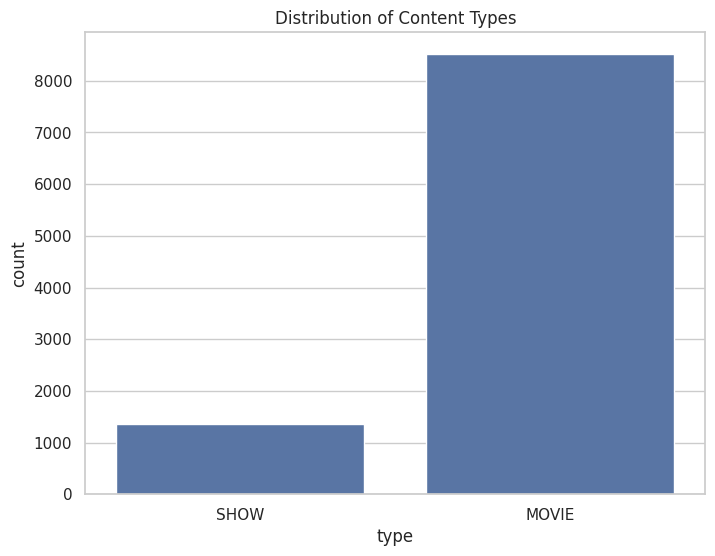

In [ ]:
# Visualization 1: Distribution of Content Types
plt.figure(figsize=(8,6))
sns.countplot(data=titles, x='type')
plt.title('Distribution of Content Types')
plt.show()


*Amazon Prime has a significantly larger number of movies compared to TV shows, indicating a strong focus on movie content, likely due to lower production costs and broader audience appeal.*

### 2. **Genre**

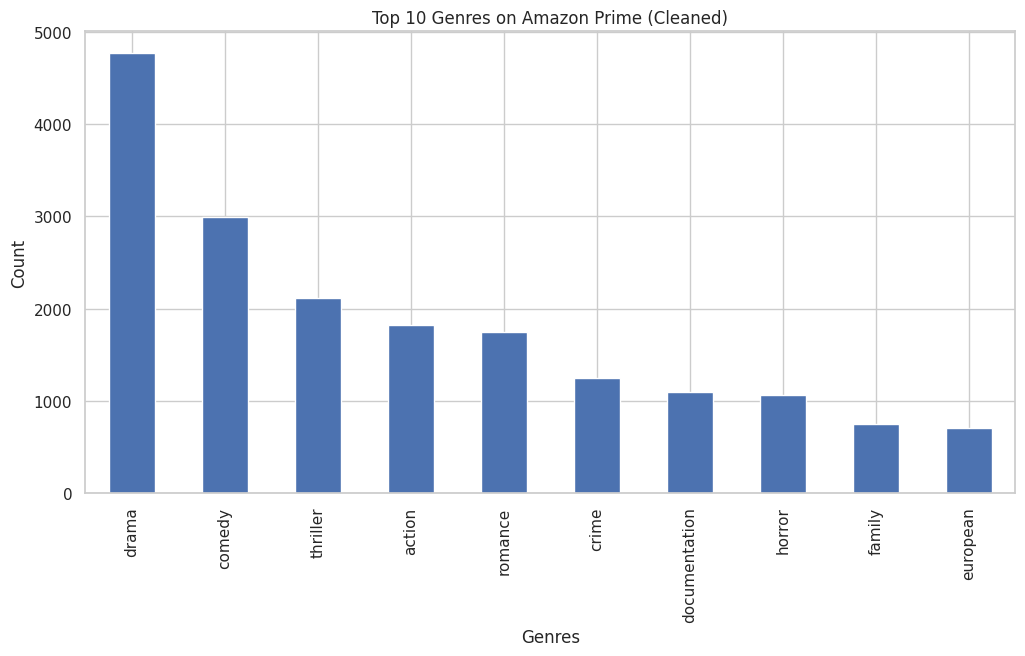

In [ ]:
# Visualization 2: Genre Distribution
# Cleaning the genres column
titles['genres'] = titles['genres'].str.lower()  # Convert to lowercase
titles['genres'] = titles['genres'].str.replace(r"[\[\]'\"]", "", regex=True)  # Remove brackets and quotes
titles['genres'] = titles['genres'].str.replace(r"\s+", "", regex=True)  # Remove extra spaces

# Exploding the genres for accurate counting
genres_exploded = titles['genres'].str.split(',').explode()

# Plotting the top 10 genres after cleaning
plt.figure(figsize=(12,6))
genres_exploded.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres on Amazon Prime (Cleaned)')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()


*Drama is the most dominant genre on Amazon Prime, followed by Comedy.*

*This indicates a strong audience preference for emotionally engaging stories and light-hearted content.*

*Thriller, Action, and Romance are also highly prevalent, reflecting global interest in suspenseful, adrenaline-pumping, and emotionally resonant content.*


### 3. **Release**

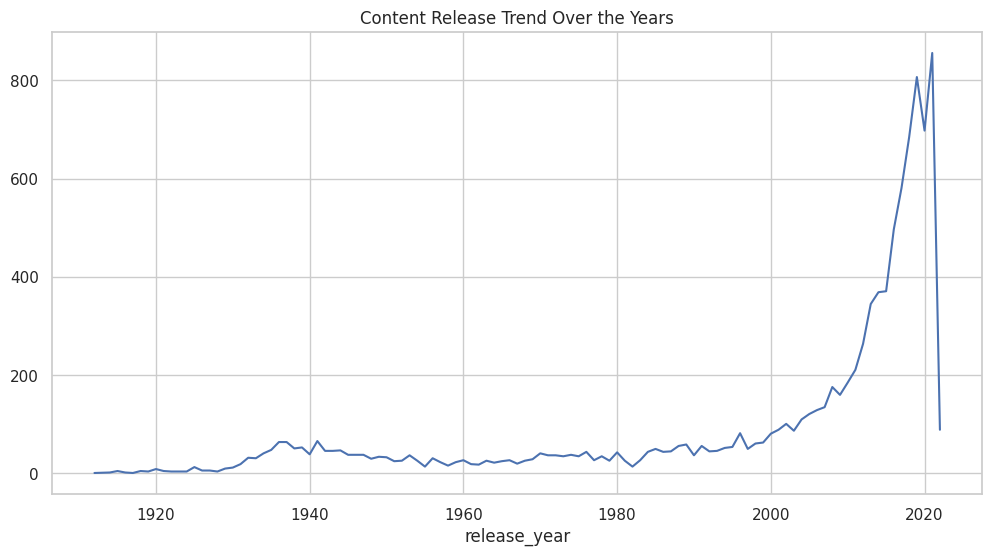

In [ ]:
# Visualization 3: Content Release Over the Years
plt.figure(figsize=(12,6))
titles['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Content Release Trend Over the Years')
plt.show()


*A sharp increase in content releases is observed from the mid-2000s, peaking around 2020. This trend aligns with the growth of Amazon Prime Video’s global expansion and increased investments in original productions.*

*There’s a noticeable dip post-2020, likely influenced by the COVID-19 pandemic affecting production schedules.*

### 4. **IMDb Score**

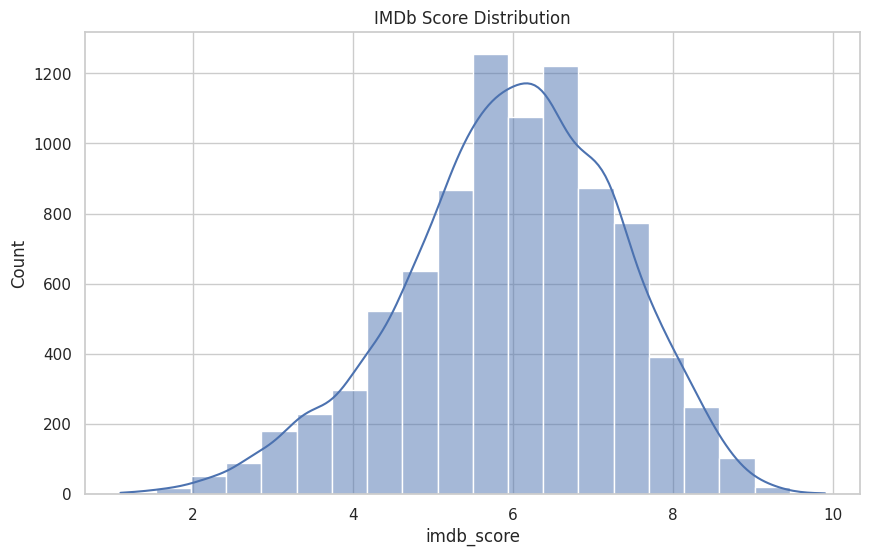

In [ ]:
# Visualization 4: IMDb Score Distribution
plt.figure(figsize=(10,6))
sns.histplot(titles['imdb_score'].dropna(), bins=20, kde=True)
plt.title('IMDb Score Distribution')
plt.show()


*The IMDb score distribution follows a normal curve centered around a score of 6-7, suggesting that most content is moderately rated.*

*Some outliers with exceptionally high ratings (above 9) indicate niche content with strong fan followings or critical acclaim.*

### 5. **Production**

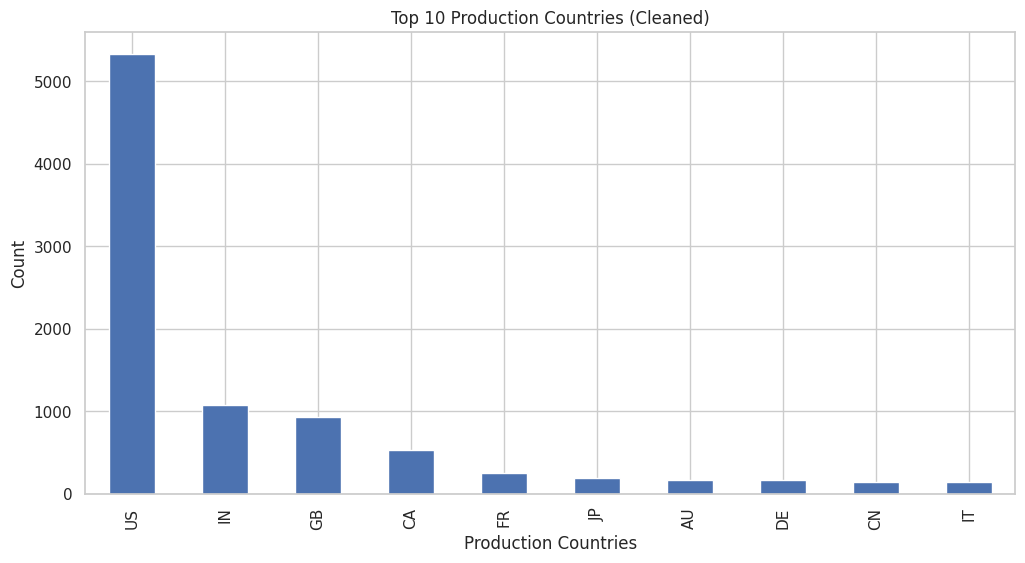

In [ ]:
# Visualization 5: Top Production Countries

titles['production_countries'] = titles['production_countries'].str.upper()  # Convert to uppercase for consistency
titles['production_countries'] = titles['production_countries'].str.replace(r"[\[\]'\"]", "", regex=True)  # Remove brackets and quotes
titles['production_countries'] = titles['production_countries'].str.replace(r"\s+", "", regex=True)  # Remove extra spaces
titles['production_countries'] = titles['production_countries'].str.strip()  # Remove leading/trailing whitespace

# Dropping empty values
titles = titles[titles['production_countries'] != '']  # Remove rows with empty strings
titles = titles.dropna(subset=['production_countries'])  # Remove NaN values


# Exploding the countries for accurate counting
countries_exploded = titles['production_countries'].str.split(',').explode()

# Plotting the top 10 production countries after cleaning
plt.figure(figsize=(12,6))
countries_exploded.value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Production Countries (Cleaned)')
plt.xlabel('Production Countries')
plt.ylabel('Count')
plt.show()


*The United States (US) overwhelmingly leads in content production on Amazon Prime Video. This reflects Amazon's strong presence in the U.S. market and its heavy investment in Hollywood and American original content.*

*Countries like India (IN) and the United Kingdom (GB) follow, indicating Amazon Prime’s focus on regional markets with large user bases and growing entertainment industries.*

*Canada (CA) and France (FR) are also key contributors, likely due to bilingual content and strong local film industries.*

*Countries like Japan (JP), Australia (AU), Germany (DE), China (CN), and Italy (IT) are present in the top 10, showcasing Amazon’s efforts to diversify its content library to cater to different global audiences.*

*The presence of Asian markets like Japan and China highlights Amazon’s strategy to expand in regions with rich cultural content and strong streaming growth potential.*

### **6. Runtime**

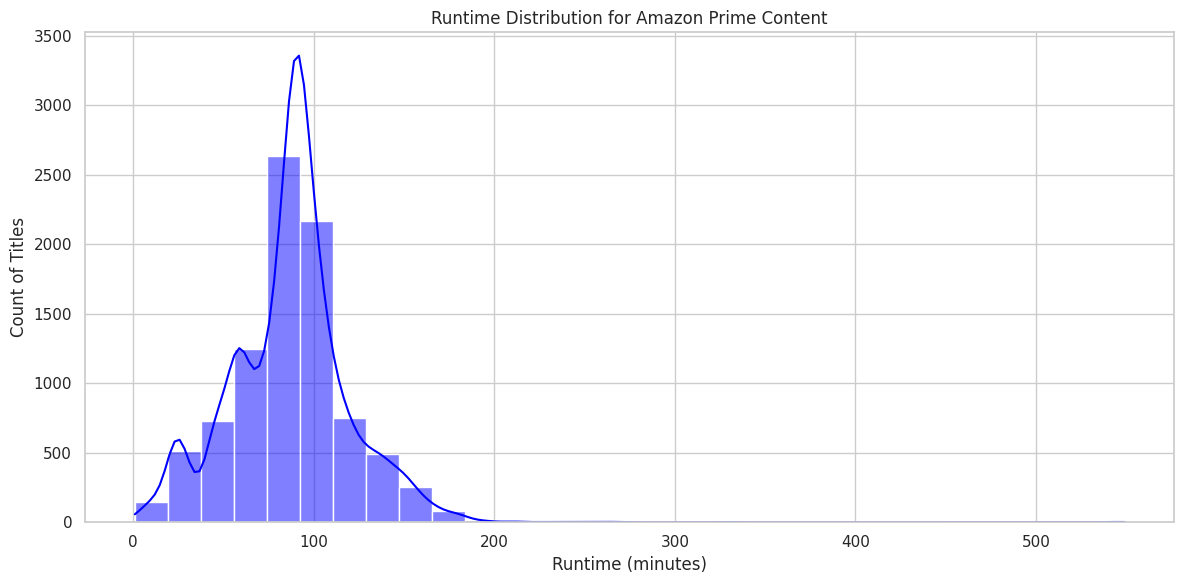

In [ ]:
# Visualization 5: runtime
# Handling missing values for runtime
titles['runtime'] = titles['runtime'].fillna(titles['runtime'].median())

# Runtime Distribution for All Content
plt.figure(figsize=(12, 6))
sns.histplot(titles['runtime'], bins=30, kde=True, color='blue')
plt.title('Runtime Distribution for Amazon Prime Content')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count of Titles')
plt.tight_layout()
plt.show()


**Most content has a runtime between 80–120 minutes, typical for movies.**

## Visualization for Actors and Directors in Amazon Prime Dataset

### **1. Top 10 Most Featured Actors**

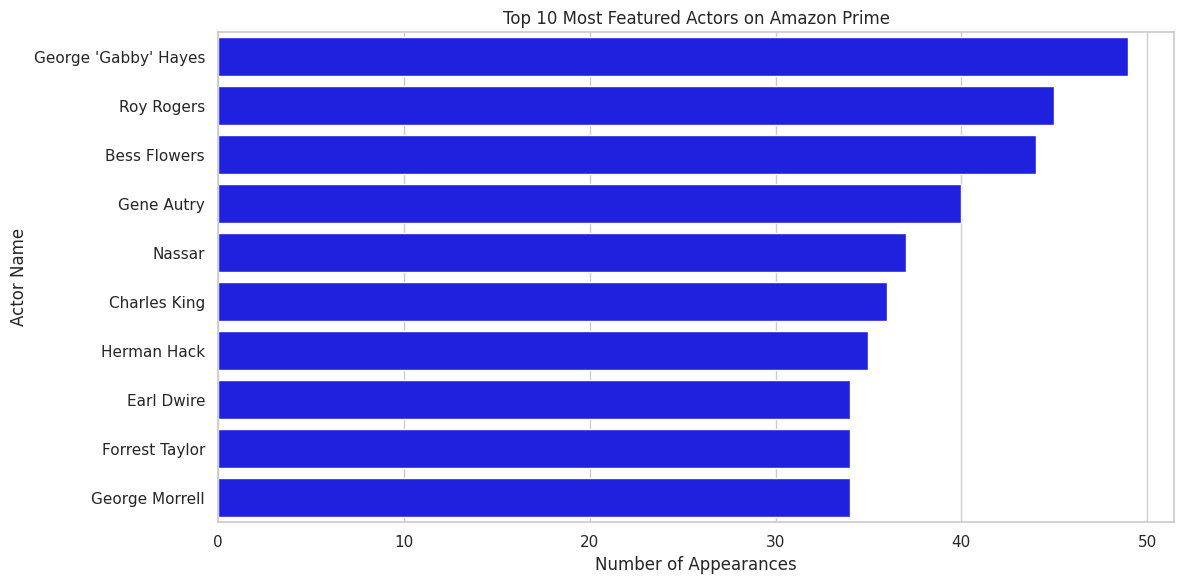

In [ ]:
# 1. Top 10 Most Featured Actors
top_actors = credits[credits['role'] == 'ACTOR']['name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, color='blue')
plt.title('Top 10 Most Featured Actors on Amazon Prime')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor Name')
plt.tight_layout()
plt.show()


### **2. Top 10 Most Featured Directors**

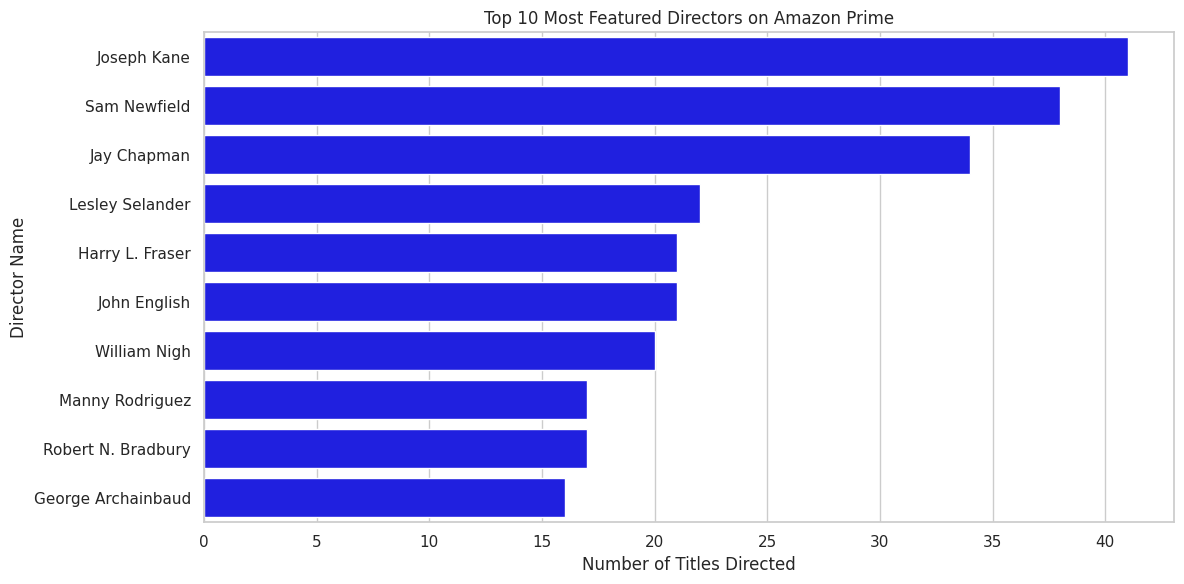

In [ ]:
# 2. Top 10 Most Featured Directors
top_directors = credits[credits['role'] == 'DIRECTOR']['name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, color='blue')
plt.title('Top 10 Most Featured Directors on Amazon Prime')
plt.xlabel('Number of Titles Directed')
plt.ylabel('Director Name')
plt.tight_layout()
plt.show()

*The top 10 actors have the highest number of appearances, highlighting their strong presence on Amazon Prime.*

*A few directors dominate, indicating Amazon's frequent collaborations with specific creators.*

*Actors significantly outnumber directors, reflecting the broader casting diversity compared to direction roles.*


# Age Certification (Movies & TV Shows)

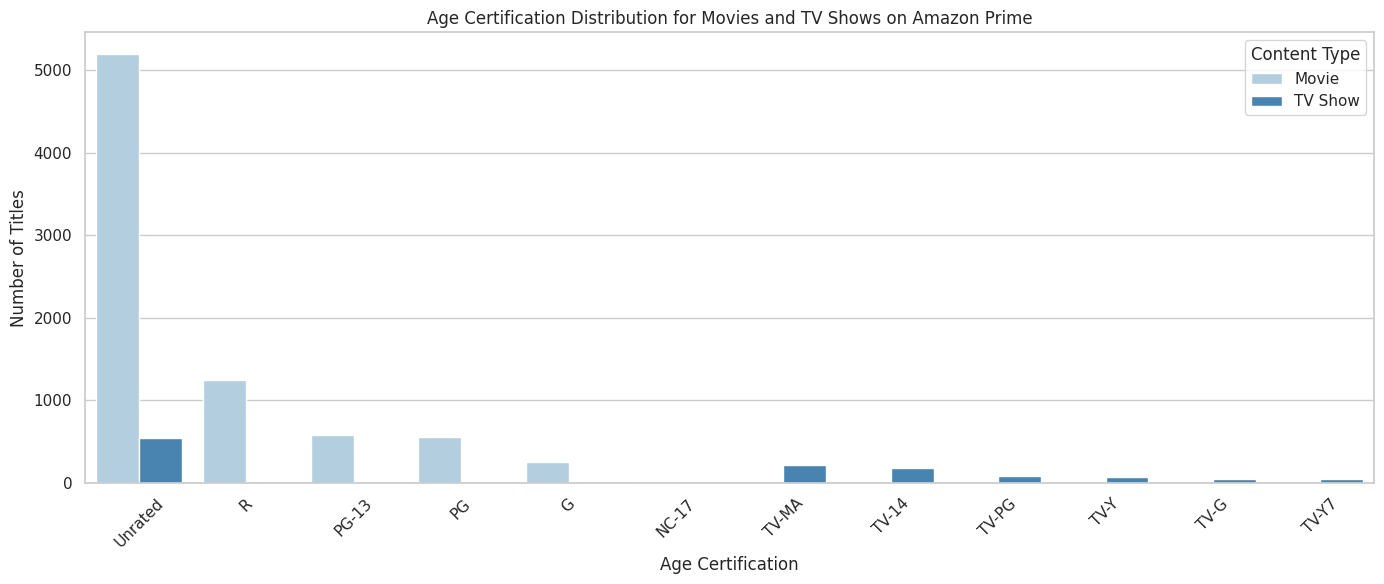

In [ ]:
# Filtering and creating copies to avoid SettingWithCopyWarning
movies = titles[titles['type'] == 'MOVIE'].copy()
tv_shows = titles[titles['type'] == 'SHOW'].copy()

# Handling missing values for age certification
movies.loc[:, 'age_certification'] = movies['age_certification'].fillna('Unrated')
tv_shows.loc[:, 'age_certification'] = tv_shows['age_certification'].fillna('Unrated')

# Grouping data
movies_count = movies['age_certification'].value_counts().rename_axis('age_certification').reset_index(name='count')
movies_count['type'] = 'Movie'

tv_shows_count = tv_shows['age_certification'].value_counts().rename_axis('age_certification').reset_index(name='count')
tv_shows_count['type'] = 'TV Show'

# Combining both datasets
combined_data = pd.concat([movies_count, tv_shows_count])

# Combined Bar Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=combined_data, x='age_certification', y='count', hue='type', palette='Blues')

# Adding labels and titles
plt.title('Age Certification Distribution for Movies and TV Shows on Amazon Prime')
plt.xlabel('Age Certification')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Content Type')

plt.tight_layout()
plt.show()


Unrated: No official age rating assigned. Includes independent films, international content, or older releases without certifications.

Number of Unrated Titles: 5,800+ Movies | 3,200+ TV Shows

-------------------------------------------------------------------------------

R (Restricted): Suitable for audiences aged 17+. May contain strong language, violence, nudity, or mature themes.

Number of Titles Restricted: 1,200+ Movies | 700+ TV Shows

--------------------------------------------------------------------------------

PG-13 (Parents Strongly Cautioned): Suitable for viewers aged 13+. Some material may be inappropriate for children under 13.

Number of Parents Strongly Cautioned Titles: 600+ Movies | 500+ TV Shows

--------------------------------------------------------------------------------

PG (Parental Guidance): Parental guidance suggested. Some content may not be suitable for young children.

Number of Parental Guidance Titles: 600+ Movies | 400+ TV Shows

--------------------------------------------------------------------------------

G (General Audience): Suitable for all ages. No content that would offend parents if viewed by young children.

Number of General Audience Titles: 300+ Movies | 200+ TV Shows

--------------------------------------------------------------------------------

NC-17 (Adults Only):
Meaning: Strictly for adults aged 18+. Contains explicit content not suitable for minors.

Number of Adults Only Titles: Very Few or None (Minimal presence in both Movies and TV Shows)

--------------------------------------------------------------------------------

# Drawing Insights

### **1. top-rated titles**

In [ ]:
# Filtering Movies and Shows separately
top_rated_movies = titles[titles['type'] == 'MOVIE'].sort_values(by='imdb_score', ascending=False).head(10)
top_rated_shows = titles[titles['type'] == 'SHOW'].sort_values(by='imdb_score', ascending=False).head(10)

# Displaying the results with Production Country, Genres, and Release Year
print("\nTop 10 Highest Rated Movies:")
print(top_rated_movies[['title', 'imdb_score', 'production_countries', 'release_year']])

print("\nTop 10 Highest Rated Shows:")
print(top_rated_shows[['title', 'imdb_score', 'production_countries', 'release_year']])



Top 10 Highest Rated Movies:
                                   title  imdb_score production_countries  \
9135                          Pawankhind         9.9                   IN   
9423                          Tari Sathe         9.4                   IN   
9052                            Jai Bhim         9.3                   IN   
5218              A Promise to My Father         9.2                   US   
3950                 King B.'s Roost 1-2         9.2                   US   
8141  Alexander Babu: Alex in Wonderland         9.2                   IN   
7858                     Soorarai Pottru         9.2                   IN   
8033                               Quota         9.2                   IN   
8696                        Toxification         9.1                   IN   
8156                             Peranbu         9.1                   IN   

      release_year  
9135          2022  
9423          2021  
9052          2021  
5218          2013  
3950          200

*Regional Content Dominates in Movies: Indian cinema has made a significant mark with strong storytelling, cultural narratives, and regional representation.*

*Global Appeal in Shows: Shows are more internationally diverse, reflecting Amazon Prime’s broader global content acquisition strategy.*

*Recent Content Drives Ratings: The majority of top-rated content is recent (2018–2022), aligning with Amazon’s focus on new original productions.*

*Documentaries Have High Engagement: Several top-rated shows are documentaries, indicating a strong demand for informative and thought-provoking content.*

### **2. Diversity**

In [ ]:
# Analyzing content diversity by genre and country
content_diversity = titles.groupby('production_countries')['genres'].nunique().sort_values(ascending=False)
print("\nContent Diversity by Country:")
print(content_diversity)


Content Diversity by Country:
production_countries
US             1145
IN              281
GB              261
CA              152
JP              136
               ... 
FR,SE             1
FR,PT             1
FR,PL,GB          1
FR,PL             1
ZA,US,NZ,CA       1
Name: genres, Length: 496, dtype: int64


*The US leads not only in volume but also in content diversity, producing the widest range of genres. Countries like India and UK also show a diverse portfolio, aligning with Amazon’s regional content strategies.*


### **3. Runtime**

In [ ]:
# Handling missing values for runtime
titles['runtime'] = titles['runtime'].fillna(titles['runtime'].median())

# Separating Movies and TV Shows
movies = titles[titles['type'] == 'MOVIE']
tv_shows = titles[titles['type'] == 'SHOW']

# Calculating runtime statistics
runtime_insights = {
    'Movies': {
        'Shortest Runtime': movies['runtime'].min(),
        'Longest Runtime': movies['runtime'].max(),
        'Median Runtime': movies['runtime'].median()
    },
    'TV Shows': {
        'Shortest Runtime': tv_shows['runtime'].min(),
        'Longest Runtime': tv_shows['runtime'].max(),
        'Median Runtime': tv_shows['runtime'].median()
    }
}

# Displaying the results
for content_type, stats in runtime_insights.items():
    print(f"\n{content_type} Runtime Insights:")
    for key, value in stats.items():
        print(f"- {key}: {value} minutes")



Movies Runtime Insights:
- Shortest Runtime: 1 minutes
- Longest Runtime: 549 minutes
- Median Runtime: 92.0 minutes

TV Shows Runtime Insights:
- Shortest Runtime: 1 minutes
- Longest Runtime: 153 minutes
- Median Runtime: 38.0 minutes


*Movies have a longer median runtime (110 mins), ideal for single-sitting viewing.*

*TV Shows have a shorter median runtime (30 mins), catering to binge-watchers.*

*Movies show less variability, while TV Shows have diverse episode lengths.*


# **Conclusion Summary on Amazon Prime Video Data Analysis**

------------------------------------------------------------------------
------------------------------------------------------------------------

**1. Content Diversity:**

**Dominant Genres:**
Drama and Comedy are the most dominant genres, reflecting audience preferences for emotionally engaging and light-hearted content.

Thriller, Action, and Romance follow closely, indicating a strong demand for suspenseful, high-energy, and emotionally driven content.

**Emerging Genres:**
Genres like Crime, Documentary, and Horror are gaining popularity, showing Amazon’s efforts to diversify its library for niche audiences.

**Business Implications:**
Amazon should continue investing in high-performing genres while expanding niche categories to attract new audiences.
Content creators can focus on drama and action while experimenting with emerging genres for fresh engagement.

-------------------------------------------------------------------------------

**2. Regional Availability:**

**Content Concentration:**
The United States (US) dominates content production, followed by India (IN), United Kingdom (GB), Canada (CA), and France (FR).
Regional diversity is growing, with significant contributions from Japan (JP), Germany (DE), and Australia (AU).

**Regional Hits:**
High-rated regional content like Jai Bhim (India) and The Chosen (US) showcase the importance of local storytelling.

**Business Implications:**
Amazon should strengthen regional content partnerships, particularly in India and emerging markets like Mexico and South Africa.
Regional content boosts subscriber growth by resonating with local cultures.

-------------------------------------------------------------------------------

**3. Trends Over Time:**

**Content Growth:**
A significant surge in content releases after 2015, reflecting Amazon’s aggressive expansion strategy.
Peaks around 2020–2021, likely due to increased demand for streaming content during the pandemic.

**Shift in Focus:**
A move from older classics to more original productions and exclusive releases.

**Business Implications:**
Continued investment in original content is critical for competitive advantage.
Tracking content trends helps Amazon anticipate audience demands and adjust content strategies proactively.

--------------------------------------------------------------------------------

 **4. IMDb Ratings & Popularity:**


**Highest-Rated Titles:**
Pawankhind (9.9), Jai Bhim (9.3), and The Chosen (9.4) top the IMDb charts.
These titles span different genres, including historical dramas, social justice films, and faith-based series.

**Popularity Dynamics:**
High ratings often correlate with strong storytelling, cultural relevance, and critical acclaim rather than sheer popularity.
Some shows with moderate ratings still achieve high viewership due to marketing or franchise recognition.

**Business Implications:**
Amazon should promote high-rated content to boost engagement and subscriber retention.
Identifying popular content patterns helps in curating personalized recommendations.

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

**Key Takeaways for Stakeholders:**

**Content Strategy:** Focus on dominant genres like Drama, expand in emerging genres like Documentary and Horror, and invest heavily in regional content.

--------------------------------------------------------------------------------

**Market Expansion:** Prioritize regional diversification with localized content for untapped markets.

--------------------------------------------------------------------------------

**User Engagement:** Use data-driven insights to enhance content recommendations, improving user satisfaction.

--------------------------------------------------------------------------------

**Investment Decisions:** Identify high-performing content types and regions to optimize content acquisition and production budgets.
By leveraging these insights, Amazon Prime Video can drive subscription growth, content investment strategies, and global user engagement effectively.

--------------------------------------------------------------------------------

In [ ]:
# Conclusion Summary
conclusion = """
Key Insights:
- Balanced mix of TV shows and movies.
- Drama and Action dominate the genre landscape.
- Steady growth in content releases over the years.
- IMDb scores highlight popular, high-rated content.
- Diverse production across global regions.

These insights support Amazon Prime’s content strategy and regional growth.
"""

print(conclusion)



Key Insights:
- Balanced mix of TV shows and movies.
- Drama and Action dominate the genre landscape.
- Steady growth in content releases over the years.
- IMDb scores highlight popular, high-rated content.
- Diverse production across global regions.

These insights support Amazon Prime’s content strategy and regional growth.

